<a href="https://colab.research.google.com/github/AnastasiyaVeresova/BasePython/blob/main/A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

import numpy as np
from openpyxl import Workbook
import seaborn as sns
from openpyxl.chart import BarChart, Reference
import plotly.express as px



In [7]:
df=pd.read_excel('/content/sample_data/Премиум авто.xlsm')

# **df_sheet1**

In [8]:
df_sheet1 = pd.read_excel('/content/sample_data/Премиум авто.xlsm', sheet_name='Справочник')

**Смотрим данные о датафрейме с листа "Справочник"**

In [9]:
df_sheet1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Марка           16 non-null     object 
 1   Модель          16 non-null     object 
 2   Цена            16 non-null     float64
 3   Валюта          16 non-null     object 
 4   Маржинальность  16 non-null     float64
dtypes: float64(2), object(3)
memory usage: 768.0+ bytes


**Мы видим, что в справочнике 16 строк, 5 колонок, в тч из них вещественные - 2, строковые данные - 3, пустые ячейки отсутствуют**

**Выведем заголовки**

In [10]:
print(df_sheet1.columns.ravel())

Index(['Марка', 'Модель', 'Цена', 'Валюта', 'Маржинальность'], dtype='object')


**Посмотрим на диапазон цен**

In [11]:
df['Цена'].min(), df['Цена'].max()

(51666.6666666667, 7200000.0)

In [12]:
price_list = df['Цена'].tolist()

In [13]:
print(price_list)

[113513.513513514, 174324.324324324, 72222.2222222222, 51666.6666666667, 2300000.0, 3850000.0, 2200000.0, 3350000.0, 2750000.0, 2100000.0, 5300000.0, 5900000.0, 7200000.0, 2050000.0, 4650000.0, 3950000.0]


**Выведем сводную таблицу по значениям цен в аргументе min/mean/max для моделей**

In [14]:
model_values = df_sheet1.groupby('Модель').agg({'Цена':['min', 'mean', 'max']})
model_values

Цена                            
                 min          mean           max
Модель                                          
318     2.100000e+06  2.100000e+06  2.100000e+06
530d    5.300000e+06  5.300000e+06  5.300000e+06
GLE     7.200000e+06  7.200000e+06  7.200000e+06
GT_AMG  1.743243e+05  1.743243e+05  1.743243e+05
c200    2.750000e+06  2.750000e+06  2.750000e+06
cla     2.050000e+06  2.050000e+06  2.050000e+06
cls     4.650000e+06  4.650000e+06  4.650000e+06
e220    3.850000e+06  3.850000e+06  3.850000e+06
e400    5.900000e+06  5.900000e+06  5.900000e+06
glc     3.950000e+06  3.950000e+06  3.950000e+06
gls     1.135135e+05  1.135135e+05  1.135135e+05
i3      5.166667e+04  5.166667e+04  5.166667e+04
x1      2.200000e+06  2.200000e+06  2.200000e+06
x3      3.350000e+06  3.350000e+06  3.350000e+06
x5      7.222222e+04  7.222222e+04  7.222222e+04
с180    2.300000e+06  2.300000e+06  2.300000e+06

**Проверим есть ли отсутствующие значения**

In [15]:
df_sheet1.isnull().sum ()

Марка             0
Модель            0
Цена              0
Валюта            0
Маржинальность    0
dtype: int64

In [16]:
df_sheet1.isna().sum()

Марка             0
Модель            0
Цена              0
Валюта            0
Маржинальность    0
dtype: int64

**Отсутствующих значений нет**

**Выведем первые пять строк**

In [17]:
df_sheet1.head()

,Марка,Модель,Цена,Валюта,Маржинальность
0,MERCEDES,gls,1.135135e+05,$,0.33
1,MERCEDES,GT_AMG,1.743243e+05,$,0.34
2,BMW,x5,7.222222e+04,Евро,0.27
3,BMW,i3,5.166667e+04,Евро,0.35
4,MERCEDES,с180,2.300000e+06,Рубль,0.20


In [18]:
reliance = pd.read_excel('/content/sample_data/Премиум авто.xlsm', sheet_name='Справочник', index_col='Маржинальность',
                       parse_dates=True)

# Printing dataFrame
reliance.head()

<ipython-input-18-8a916f064d4d>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  reliance = pd.read_excel('/content/sample_data/Премиум авто.xlsm', sheet_name='Справочник', index_col='Маржинальность',


,Марка,Модель,Цена,Валюта
Маржинальность,,,,
0.33,MERCEDES,gls,1.135135e+05,$
0.34,MERCEDES,GT_AMG,1.743243e+05,$
0.27,BMW,x5,7.222222e+04,Евро
0.35,BMW,i3,5.166667e+04,Евро
0.20,MERCEDES,с180,2.300000e+06,Рубль


**Добавим диаграмму для наглядного распределения средних стоимостных значений по моделям**

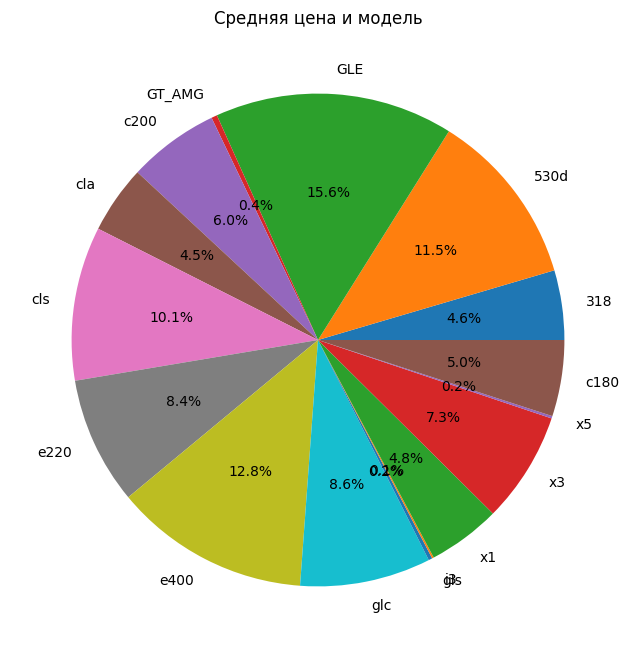

In [19]:
model_values.columns = model_values.columns.droplevel()
plt.figure(figsize=(12, 8))
plt.pie(model_values['mean'], labels=model_values.index, autopct='%.1f%%')
plt.title('Средняя цена и модель')
plt.show()

**Добавим диаграмму по ценам**

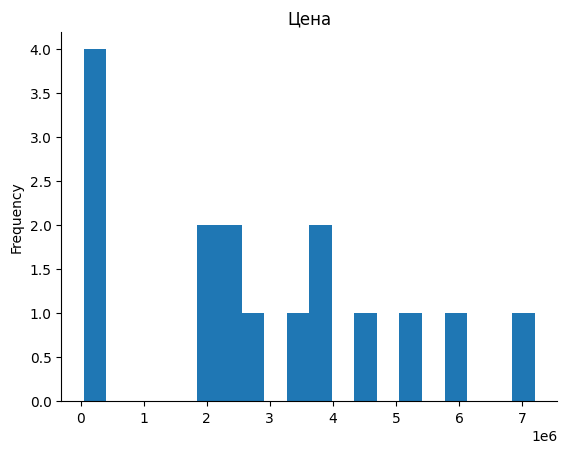

In [20]:
# @title Цена

from matplotlib import pyplot as plt
df_sheet1['Цена'].plot(kind='hist', bins=20, title='Цена')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Добавим диаграмму по маркам**

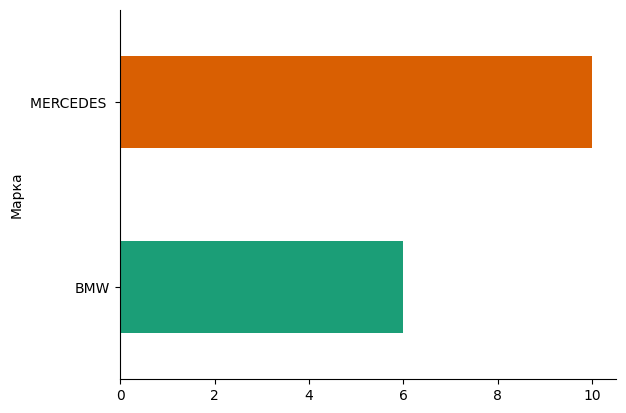

In [21]:
# @title Марка

df_sheet1.groupby('Марка').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# **df_sheet2**

In [22]:
df_sheet2 = pd.read_excel('/content/sample_data/Премиум авто.xlsm', sheet_name='Маркетинговые данные')

**Смотрим данные о датафрейме с листа "Маркетинговые данные"**

In [23]:
df_sheet2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66162 entries, 0 to 66161
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client ID                 66162 non-null  object 
 1   Domain                    66162 non-null  object 
 2   City                      66162 non-null  object 
 3   Region                    66162 non-null  object 
 4   Browser                   66162 non-null  object 
 5   Device Category           66162 non-null  object 
 6   Date                      66162 non-null  object 
 7   Pageviews                 66162 non-null  int64  
 8   Campaign                  66162 non-null  object 
 9   Keyword                   64710 non-null  object 
 10  Medium                    66162 non-null  object 
 11  Source                    66162 non-null  object 
 12  Avg. Session Duration     66162 non-null  float64
 13  Bounce Rate               66162 non-null  float64
 14  Sessio

**Мы видим, что в Маркетинговых данных 66162 строк, 23 колонки, в тч из них вещественных - 3, целочисленных - 4,строковые данные - 16, пустые ячейки отсутствуют**

**Выведем заголовки**

In [24]:
print(df_sheet2.columns.ravel())

Index(['Client ID', 'Domain', 'City', 'Region', 'Browser', 'Device Category',
       'Date', 'Pageviews', 'Campaign', 'Keyword', 'Medium', 'Source',
       'Avg. Session Duration', 'Bounce Rate', 'Sessions',
       'Goal Completion Location', 'Goal Completions', 'Goal Conversion Rate',
       'Goal Value', 'Конверсия', 'Source conv.', 'Марка', 'Модель'],
      dtype='object')


**Проверим есть ли отсутствующие значения**

In [25]:
df_sheet2.isna().sum()

Client ID                      0
Domain                         0
City                           0
Region                         0
Browser                        0
Device Category                0
Date                           0
Pageviews                      0
Campaign                       0
Keyword                     1452
Medium                         0
Source                         0
Avg. Session Duration          0
Bounce Rate                    0
Sessions                       0
Goal Completion Location       0
Goal Completions               0
Goal Conversion Rate           0
Goal Value                     0
Конверсия                      0
Source conv.                   0
Марка                          0
Модель                         0
dtype: int64

**Keyword - 1452**  

**Goal Conversion Rate - 65492**  


In [26]:
reliance = pd.read_excel('/content/sample_data/Премиум авто.xlsm', sheet_name='Маркетинговые данные', index_col='Date',
                       parse_dates=True)

# Printing dataFrame
reliance.head()

<ipython-input-26-dc7c7c7ee2bd>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  reliance = pd.read_excel('/content/sample_data/Премиум авто.xlsm', sheet_name='Маркетинговые данные', index_col='Date',


,Client ID,Domain,City,Region,Browser,Device Category,Pageviews,Campaign,Keyword,Medium,...,Bounce Rate,Sessions,Goal Completion Location,Goal Completions,Goal Conversion Rate,Goal Value,Конверсия,Source conv.,Марка,Модель
Date,,,,,,,,,,,,,,,,,,,,,
14 февраля 2020 г.,GA1.2.1029165320.1581675414,BMW-keyauto-krd.ru,Zurich,Zurich,Chrome,mobile,18,(not set),(not set),referral,...,0.0,1,/offers/buy/?trade_source=footer,1,1.0,38039,1,cars.BMW-keyauto-krd.ru,BMW,Нет данных
14 февраля 2020 г.,GA1.2.1029165320.1581675414,cars.BMW-keyauto-krd.ru,Zurich,Zurich,Chrome,mobile,6,(not set),(not set),referral,...,0.0,2,/,1,0.5,17971,1,BMW-keyauto-krd.ru,BMW,Нет данных
14 февраля 2020 г.,GA1.2.1029165320.1581675414,BMW-keyauto-krd.ru,Zurich,Zurich,Chrome,mobile,18,(not set),(not set),referral,...,0.0,1,/,1,1.0,21442,1,cars.BMW-keyauto-krd.ru,BMW,Нет данных
28 января 2020 г.,GA1.2.360702973.1573932024,BMW-keyauto-krd.ru,Zurich,Zurich,YaBrowser,mobile,2,(not set),(not set),referral,...,0.0,1,/models/NewElantra/,0,0.0,0,0,yandex.ru,Mersedes,Нет данных
27 января 2020 г.,GA1.2.1394084210.1579796276,Mersedes-krasnodar.ru,Zurich,Zurich,Chrome,mobile,2,(not set),(not provided),organic,...,0.0,2,/models/cla/options/,1,0.5,8498,1,google,BMW,cla


In [27]:
for col in df_sheet2:
    if col == 'Device Category':
        print(df_sheet2[col].unique())

['mobile' 'desktop' 'tablet']


In [28]:
df_sheet2[df_sheet2['Device Category']=='tablet']

,Client ID,Domain,City,Region,Browser,Device Category,Date,Pageviews,Campaign,Keyword,...,Bounce Rate,Sessions,Goal Completion Location,Goal Completions,Goal Conversion Rate,Goal Value,Конверсия,Source conv.,Марка,Модель
26,GA1.2.1262568414.1580194715,BMW-keyauto-krd.ru,Yaroslavl,Yaroslavl Oblast,Samsung Internet,tablet,28 января 2020 г.,8,(not set),(not set),...,0.0,1,/?keyauto_from=1,0,0.0,0,0,(direct),BMW,Нет данных
39,GA1.2.1300535099.1578738386,BMW-keyauto-krd.ru,Novy Urengoy,Yamalo-Nenets Autonomous Okrug,Chrome,tablet,11 января 2020 г.,6,(not set),(not set),...,0.0,1,(entrance),0,0.0,0,0,YANDEX,Mersedes,Нет данных
51,GA1.2.1234461962.1581782771,Mersedes-krasnodar.ru,Nadym,Yamalo-Nenets Autonomous Okrug,Safari,tablet,15 февраля 2020 г.,6,(not set),(not set),...,0.0,1,/,1,1.0,9080,1,Mersedes.ru,Mersedes,Нет данных
52,GA1.2.50779457.1581823986,Mersedes-krasnodar.ru,Nadym,Yamalo-Nenets Autonomous Okrug,Safari,tablet,16 февраля 2020 г.,6,(not set),(not set),...,0.0,1,/,1,1.0,27288,1,Mersedes.ru,BMW,Нет данных
53,GA1.2.1526151603.1581826092,BMW-keyauto-krd.ru,Nadym,Yamalo-Nenets Autonomous Okrug,Safari,tablet,16 февраля 2020 г.,4,(not set),(not set),...,0.0,1,/,1,1.0,17179,1,BMW.ru,Mersedes,Нет данных
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66040,GA1.2.1351214746.1576596334,BMW-keyauto-krd.ru,Yerevan,(not set),Safari,tablet,10 января 2020 г.,8,(not set),(not provided),...,0.0,1,/,1,1.0,36500,1,google,Mersedes,Нет данных
66055,GA1.2.2105628381.1579670133,Mersedes-krasnodar.ru,Viline,(not set),Chrome,tablet,10 февраля 2020 г.,14,(not set),(not provided),...,0.0,2,/,0,0.0,0,0,google,Mersedes,Нет данных
66065,GA1.2.1932044500.1580214867,cars.Mersedes-krasnodar.ru,Yerevan,(not set),Chrome,tablet,28 января 2020 г.,10,(not set),(not provided),...,0.0,1,/,0,0.0,0,0,google,Mersedes,Нет данных
66078,GA1.2.820280860.1580376869,Mersedes-krasnodar.ru,Yerevan,(not set),Chrome,tablet,30 января 2020 г.,6,(not set),(not provided),...,0.0,1,/,0,0.0,0,0,google,BMW,Нет данных


In [29]:
df_sheet2[df_sheet2['Device Category']=='desktop']

,Client ID,Domain,City,Region,Browser,Device Category,Date,Pageviews,Campaign,Keyword,...,Bounce Rate,Sessions,Goal Completion Location,Goal Completions,Goal Conversion Rate,Goal Value,Конверсия,Source conv.,Марка,Модель
8,GA1.2.1235381720.1579517675,Mersedes-krasnodar.ru,Zurich,Zurich,Chrome,desktop,20 января 2020 г.,8,36451504,купить киа рио в краснодаре,...,0.0,1,/special/purchase/e220/?calltouch_tm=yd_c:3645...,0,0.0,0,0,YANDEX,Mersedes,e220
9,GA1.2.1235381720.1579517675,Mersedes-krasnodar.ru,Zurich,Zurich,Chrome,desktop,30 января 2020 г.,2,36451504,купить киа рио в краснодаре,...,0.0,1,/special/purchase/e220/?calltouch_tm=yd_c:3645...,0,0.0,0 ₽,0,YANDEX,BMW,e220
10,GA1.2.1612465029.1581839176,BMW-keyauto-krd.ru,Ovruch,Zhytomyr Oblast,Firefox,desktop,16 февраля 2020 г.,2,(not set),(not provided),...,0.0,1,/about/copyrights/,1,1.0,13363,1,google,BMW,Нет данных
11,GA1.2.172612889.1581947825,BMW-keyauto-krd.ru,Zhytomyr,Zhytomyr Oblast,Chrome,desktop,17 февраля 2020 г.,2,(not set),(not provided),...,0.0,1,/news/BMW-motor-predstavlyaet-elektricheskiy-k...,0,0.0,0,0,google,BMW,Нет данных
13,GA1.2.343495629.1578167900,Mersedes-krasnodar.ru,Zaporizhzhia,Zaporizhia Oblast,Safari,desktop,4 января 2020 г.,16,(not set),(not provided),...,0.0,1,/,0,0.0,0,0,google,Mersedes,Нет данных
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66152,GA1.2.1782395516.1579252035,Mersedes-krasnodar.ru,Baku,(not set),YaBrowser,desktop,17 января 2020 г.,12,36451549,Mersedes краснодар,...,0.0,1,/special/purchase/?calltouch_tm=yd_c:36451549_...,0,0.0,0,0,YANDEX,Mersedes,Нет данных
66153,GA1.2.1584342558.1581661366,Mersedes-krasnodar.ru,(not set),(not set),Chrome,desktop,14 февраля 2020 г.,4,36451549,киа салон,...,0.0,1,/special/purchase/?calltouch_tm=yd_c:36451549_...,0,0.0,0 ₽,0,YANDEX,Mersedes,Нет данных
66155,GA1.2.537460162.1581585174,Mersedes-krasnodar.ru,(not set),(not set),YaBrowser,desktop,13 февраля 2020 г.,4,36451549,киа краснодар,...,0.0,1,/special/purchase/?calltouch_tm=yd_c:36451549_...,0,0.0,0 ₽,0,YANDEX,Mersedes,Нет данных
66157,GA1.2.719597775.1578814255,BMW-keyauto-krd.ru,(not set),(not set),YaBrowser,desktop,12 января 2020 г.,2,(not set),ключ-авто краснодар официальный сайт,...,0.0,1,/,1,1.0,26 787 ₽,1,YANDEX,Mersedes,Нет данных


In [30]:
df_sheet2[df_sheet2['Device Category']=='mobile']

,Client ID,Domain,City,Region,Browser,Device Category,Date,Pageviews,Campaign,Keyword,...,Bounce Rate,Sessions,Goal Completion Location,Goal Completions,Goal Conversion Rate,Goal Value,Конверсия,Source conv.,Марка,Модель
0,GA1.2.1029165320.1581675414,BMW-keyauto-krd.ru,Zurich,Zurich,Chrome,mobile,14 февраля 2020 г.,18,(not set),(not set),...,0.0,1,/offers/buy/?trade_source=footer,1,1.0,38039,1,cars.BMW-keyauto-krd.ru,BMW,Нет данных
1,GA1.2.1029165320.1581675414,cars.BMW-keyauto-krd.ru,Zurich,Zurich,Chrome,mobile,14 февраля 2020 г.,6,(not set),(not set),...,0.0,2,/,1,0.5,17971,1,BMW-keyauto-krd.ru,BMW,Нет данных
2,GA1.2.1029165320.1581675414,BMW-keyauto-krd.ru,Zurich,Zurich,Chrome,mobile,14 февраля 2020 г.,18,(not set),(not set),...,0.0,1,/,1,1.0,21442,1,cars.BMW-keyauto-krd.ru,BMW,Нет данных
3,GA1.2.360702973.1573932024,BMW-keyauto-krd.ru,Zurich,Zurich,YaBrowser,mobile,28 января 2020 г.,2,(not set),(not set),...,0.0,1,/models/NewElantra/,0,0.0,0,0,yandex.ru,Mersedes,Нет данных
4,GA1.2.1394084210.1579796276,Mersedes-krasnodar.ru,Zurich,Zurich,Chrome,mobile,27 января 2020 г.,2,(not set),(not provided),...,0.0,2,/models/cla/options/,1,0.5,8498,1,google,BMW,cla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66150,GA1.2.1580553748.1579072110,Mersedes-krasnodar.ru,(not set),(not set),YaBrowser,mobile,15 января 2020 г.,4,36451549,Mersedes краснодар,...,0.0,1,/special/purchase/?calltouch_tm=yd_c:36451549_...,1,1.0,35101,1,YANDEX,Mersedes,Нет данных
66156,GA1.2.1589805735.1578900679,Mersedes-krasnodar.ru,(not set),(not set),Chrome,mobile,13 января 2020 г.,8,36451549,киа краснодар,...,0.0,1,/special/purchase/?calltouch_tm=yd_c:36451549_...,0,0.0,0 ₽,0,YANDEX,BMW,Нет данных
66158,GA1.2.1787735095.1578381366,Mersedes-krasnodar.ru,(not set),(not set),Chrome,mobile,7 января 2020 г.,2,36451531,киа спортейдж,...,0.0,1,/special/purchase/gls/?calltouch_tm=yd_c:36451...,1,1.0,23 716 ₽,1,YANDEX,Mersedes,gls
66159,GA1.2.1994191491.1578813741,Mersedes-krasnodar.ru,(not set),(not set),YaBrowser,mobile,12 января 2020 г.,2,36451549,киа краснодар,...,0.0,1,/special/purchase/?calltouch_tm=yd_c:36451549_...,1,1.0,25 289 ₽,1,YANDEX,Mersedes,Нет данных


In [31]:
df_sheet2.groupby('Device Category')['Конверсия'].sum()

Device Category
desktop    12314
mobile     19704
tablet      1015
Name: Конверсия, dtype: int64

In [32]:
df_sheet2.groupby('Device Category')['Sessions'].sum()

Device Category
desktop    28857
mobile     47710
tablet      2493
Name: Sessions, dtype: int64

In [33]:
df_sheet2.groupby('Device Category')['Pageviews'].sum()

Device Category
desktop    188316
mobile     258686
tablet      13332
Name: Pageviews, dtype: int64

In [34]:
df_sheet2.groupby('City')['Region'].sum()

City
(not set)     Zabaykalsky KraiZabaykalsky KraiZabaykalsky Kr...
Abakan        Republic of KhakassiaRepublic of KhakassiaRepu...
Abinsk        Krasnodar KraiKrasnodar KraiKrasnodar KraiKras...
Abu Dhabi                                    Abu DhabiAbu Dhabi
Achinsk       Krasnoyarsk KraiKrasnoyarsk KraiKrasnoyarsk Kr...
                                    ...                        
Zhengzhou                                                 Henan
Zhukovskiy    Moscow OblastMoscow OblastMoscow OblastMoscow ...
Zhytomyr                         Zhytomyr OblastZhytomyr Oblast
Znamenskiy    Krasnodar KraiKrasnodar KraiKrasnodar KraiKras...
Zurich        ZurichZurichZurichZurichZurichZurichZurichZuri...
Name: Region, Length: 583, dtype: object

In [35]:

# Фильтрация данных по маркам BMW и Mercedes
df_brand = df_sheet2[(df_sheet2['Марка'] == 'BMW') | (df_sheet2['Марка'] == 'Mersedes')]

# Проверка наличия ненулевых значений в столбце 'Конверсия'
df_brand = df_brand[df_brand['Конверсия'] != 0]

fig = px.sunburst(df_brand, path=['Марка', 'Модель'], values='Конверсия',
                  color='Конверсия', hover_data=['Domain'])
fig.show()

In [36]:
reliance = pd.read_excel('/content/sample_data/Премиум авто.xlsm', sheet_name='Маркетинговые данные', index_col='Date',
                       parse_dates=True)

# Printing dataFrame
reliance.head()

<ipython-input-36-dc7c7c7ee2bd>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,Client ID,Domain,City,Region,Browser,Device Category,Pageviews,Campaign,Keyword,Medium,...,Bounce Rate,Sessions,Goal Completion Location,Goal Completions,Goal Conversion Rate,Goal Value,Конверсия,Source conv.,Марка,Модель
Date,,,,,,,,,,,,,,,,,,,,,
14 февраля 2020 г.,GA1.2.1029165320.1581675414,BMW-keyauto-krd.ru,Zurich,Zurich,Chrome,mobile,18,(not set),(not set),referral,...,0.0,1,/offers/buy/?trade_source=footer,1,1.0,38039,1,cars.BMW-keyauto-krd.ru,BMW,Нет данных
14 февраля 2020 г.,GA1.2.1029165320.1581675414,cars.BMW-keyauto-krd.ru,Zurich,Zurich,Chrome,mobile,6,(not set),(not set),referral,...,0.0,2,/,1,0.5,17971,1,BMW-keyauto-krd.ru,BMW,Нет данных
14 февраля 2020 г.,GA1.2.1029165320.1581675414,BMW-keyauto-krd.ru,Zurich,Zurich,Chrome,mobile,18,(not set),(not set),referral,...,0.0,1,/,1,1.0,21442,1,cars.BMW-keyauto-krd.ru,BMW,Нет данных
28 января 2020 г.,GA1.2.360702973.1573932024,BMW-keyauto-krd.ru,Zurich,Zurich,YaBrowser,mobile,2,(not set),(not set),referral,...,0.0,1,/models/NewElantra/,0,0.0,0,0,yandex.ru,Mersedes,Нет данных
27 января 2020 г.,GA1.2.1394084210.1579796276,Mersedes-krasnodar.ru,Zurich,Zurich,Chrome,mobile,2,(not set),(not provided),organic,...,0.0,2,/models/cla/options/,1,0.5,8498,1,google,BMW,cla


**Извлекаем столбец «Goal Completions», вычисляем 30-дневную SMA и печатаем очищенный DataFrame**

In [37]:
reliance = reliance['Goal Completions'].to_frame()

# Calculate 30-day Simple Moving Average (SMA)
reliance['SMA30'] = reliance['Goal Completions'].rolling(30).mean()

# Remove NULL values
reliance.dropna(inplace=True)

# Print DataFrame
reliance

,Goal Completions,SMA30
Date,,
10 января 2020 г.,1,0.400000
14 января 2020 г.,0,0.366667
23 января 2020 г.,1,0.366667
14 января 2020 г.,0,0.333333
14 января 2020 г.,1,0.366667
...,...,...
12 января 2020 г.,1,0.500000
7 января 2020 г.,1,0.500000
12 января 2020 г.,1,0.533333


<Axes: xlabel='Date'>

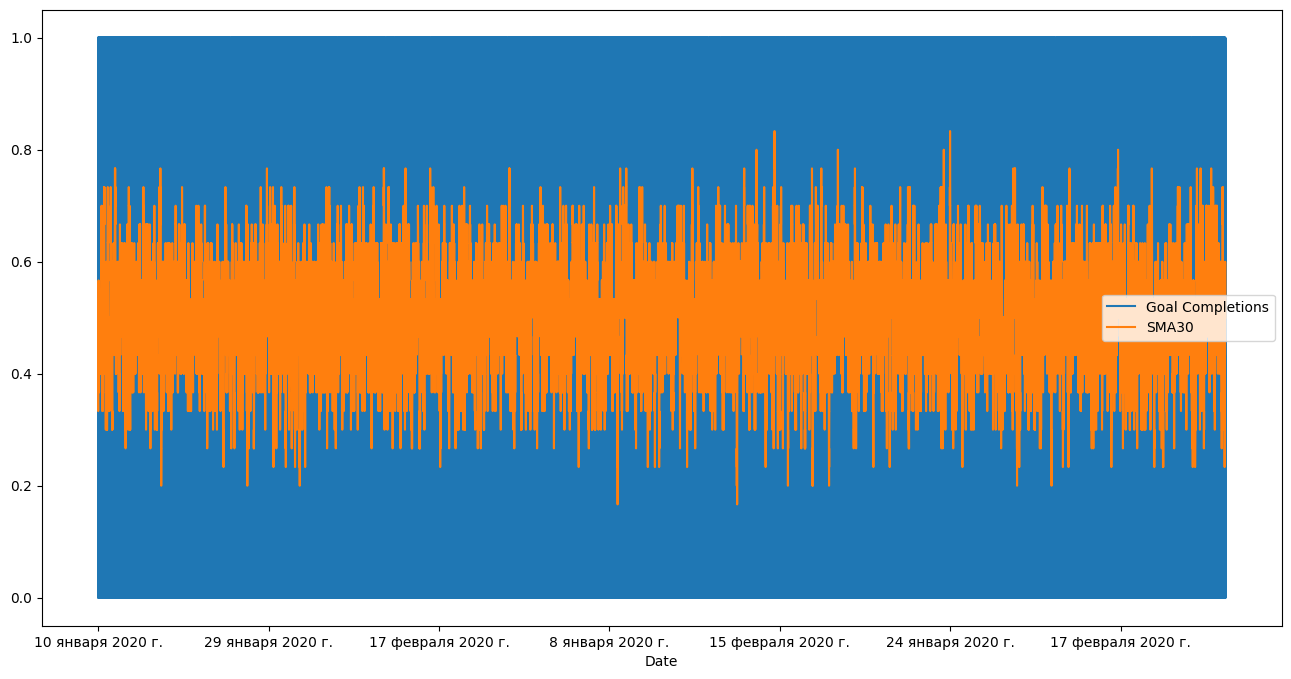

In [38]:
# @title SMA30

reliance[['Goal Completions', 'SMA30']].plot(label='RELIANCE',
                                  figsize=(16, 8))


**Выведем первые пять строк**

In [39]:
df_sheet2.head()

,Client ID,Domain,City,Region,Browser,Device Category,Date,Pageviews,Campaign,Keyword,...,Bounce Rate,Sessions,Goal Completion Location,Goal Completions,Goal Conversion Rate,Goal Value,Конверсия,Source conv.,Марка,Модель
0,GA1.2.1029165320.1581675414,BMW-keyauto-krd.ru,Zurich,Zurich,Chrome,mobile,14 февраля 2020 г.,18,(not set),(not set),...,0.0,1,/offers/buy/?trade_source=footer,1,1.0,38039,1,cars.BMW-keyauto-krd.ru,BMW,Нет данных
1,GA1.2.1029165320.1581675414,cars.BMW-keyauto-krd.ru,Zurich,Zurich,Chrome,mobile,14 февраля 2020 г.,6,(not set),(not set),...,0.0,2,/,1,0.5,17971,1,BMW-keyauto-krd.ru,BMW,Нет данных
2,GA1.2.1029165320.1581675414,BMW-keyauto-krd.ru,Zurich,Zurich,Chrome,mobile,14 февраля 2020 г.,18,(not set),(not set),...,0.0,1,/,1,1.0,21442,1,cars.BMW-keyauto-krd.ru,BMW,Нет данных
3,GA1.2.360702973.1573932024,BMW-keyauto-krd.ru,Zurich,Zurich,YaBrowser,mobile,28 января 2020 г.,2,(not set),(not set),...,0.0,1,/models/NewElantra/,0,0.0,0,0,yandex.ru,Mersedes,Нет данных
4,GA1.2.1394084210.1579796276,Mersedes-krasnodar.ru,Zurich,Zurich,Chrome,mobile,27 января 2020 г.,2,(not set),(not provided),...,0.0,2,/models/cla/options/,1,0.5,8498,1,google,BMW,cla


In [40]:
df_sheet2.size

1521726

In [41]:
df_sheet2.shape

(66162, 23)

**Создадим еще один датафрейм, в который соберем данные отфильтрованные по суб-категории авто, например, Mersedes. И еще один датафрейм, в котором оставим только пять параметров.**

In [42]:
df_sheet2_subcat_mersedes = df_sheet2[df_sheet2.Марка == 'Mersedes']
mersedes = df_sheet2_subcat_mersedes[['Модель','Goal Completions','Bounce Rate', 'Goal Value', 'Конверсия']]
mersedes.head()

,Модель,Goal Completions,Bounce Rate,Goal Value,Конверсия
3,Нет данных,0,0.0,0,0
5,Нет данных,1,0.0,15678,1
7,Нет данных,0,0.0,0,0
8,e220,0,0.0,0,0
12,Нет данных,0,0.0,0,0


**Посчитаем общее количество Goal Completions в суб-категории Mersedes за все время наблюдений.**

In [43]:
mersedes['Goal Completions'].sum()

17149

**Посчитаем общее количество Bounce Rate в суб-категории Mersedes за все время наблюдений.**

In [44]:
mersedes['Bounce Rate'].sum()

32.95

In [45]:
city_value = df_sheet2['City'].value_counts()
city_value

City
Krasnodar        36531
Sochi             5111
(not set)         2427
Rostov-on-Don     2145
Moscow            2116
                 ...  
Sofia                1
Ust-Dzheguta         1
Shymkent             1
Nanchang             1
Ganja                1
Name: count, Length: 583, dtype: int64

In [46]:
pd.crosstab(index=df['Модель'], columns=df['Марка'])

Марка,BMW,MERCEDES
Модель,,
318,1,0
530d,1,0
GLE,0,1
GT_AMG,0,1
c200,0,1
cla,0,1
cls,0,1
e220,0,1
e400,0,1


In [47]:
models_list = df['Модель'].tolist()

In [48]:
print(models_list)

['gls', 'GT_AMG', 'x5', 'i3', 'с180', 'e220', 'x1', 'x3', 'c200', 318, '530d', 'e400', 'GLE', 'cla', 'cls', 'glc']


In [49]:
marka_list = df['Марка'].tolist()

In [50]:
print(marka_list)

['MERCEDES ', 'MERCEDES ', 'BMW', 'BMW', 'MERCEDES ', 'MERCEDES ', 'BMW', 'BMW', 'MERCEDES ', 'BMW', 'BMW', 'MERCEDES ', 'MERCEDES ', 'MERCEDES ', 'MERCEDES ', 'MERCEDES ']


In [51]:
marketing_data = pd.DataFrame({
    'Марка': ['MERCEDES ', 'MERCEDES ', 'BMW', 'BMW', 'MERCEDES ', 'MERCEDES ', 'BMW', 'BMW', 'MERCEDES ', 'BMW', 'BMW', 'MERCEDES ', 'MERCEDES ', 'MERCEDES ', 'MERCEDES ', 'MERCEDES'],
    'Модель': ['gls', 'GT_AMG', 'x5', 'i3', 'с180', 'e220', 'x1', 'x3', 'c200', 318, '530d', 'e400', 'GLE', 'cla', 'cls', 'glc'],
    # Другие столбцы маркетинговых данных
})

# Создание DataFrame для "Справочника"
reference_data = pd.DataFrame({
    'Марка': ['MERCEDES ', 'MERCEDES ', 'BMW', 'BMW', 'MERCEDES ', 'MERCEDES ', 'BMW', 'BMW', 'MERCEDES ', 'BMW', 'BMW', 'MERCEDES ', 'MERCEDES ', 'MERCEDES ', 'MERCEDES ', 'MERCEDES'],
    'Модель': ['gls', 'GT_AMG', 'x5', 'i3', 'с180', 'e220', 'x1', 'x3', 'c200', 318, '530d', 'e400', 'GLE', 'cla', 'cls', 'glc'],
    'Цена': [113513.513513514, 174324.324324324, 72222.2222222222, 51666.6666666667, 2300000.0, 3850000.0, 2200000.0, 3350000.0, 2750000.0, 2100000.0, 5300000.0, 5900000.0, 7200000.0, 2050000.0, 4650000.0, 3950000.0],
    # Другие столбцы справочника
})

# Объединение данных по полям "Марка" и "Модель"
merged_data = pd.merge(marketing_data, reference_data, on=['Марка', 'Модель'], how='inner')

# Вывод объединенных данных
print(merged_data)

        Марка  Модель          Цена
0   MERCEDES      gls  1.135135e+05
1   MERCEDES   GT_AMG  1.743243e+05
2         BMW      x5  7.222222e+04
3         BMW      i3  5.166667e+04
4   MERCEDES     с180  2.300000e+06
5   MERCEDES     e220  3.850000e+06
6         BMW      x1  2.200000e+06
7         BMW      x3  3.350000e+06
8   MERCEDES     c200  2.750000e+06
9         BMW     318  2.100000e+06
10        BMW    530d  5.300000e+06
11  MERCEDES     e400  5.900000e+06
12  MERCEDES      GLE  7.200000e+06
13  MERCEDES      cla  2.050000e+06
14  MERCEDES      cls  4.650000e+06
15   MERCEDES     glc  3.950000e+06


In [52]:
df_sheet2.head()

,Client ID,Domain,City,Region,Browser,Device Category,Date,Pageviews,Campaign,Keyword,...,Bounce Rate,Sessions,Goal Completion Location,Goal Completions,Goal Conversion Rate,Goal Value,Конверсия,Source conv.,Марка,Модель
0,GA1.2.1029165320.1581675414,BMW-keyauto-krd.ru,Zurich,Zurich,Chrome,mobile,14 февраля 2020 г.,18,(not set),(not set),...,0.0,1,/offers/buy/?trade_source=footer,1,1.0,38039,1,cars.BMW-keyauto-krd.ru,BMW,Нет данных
1,GA1.2.1029165320.1581675414,cars.BMW-keyauto-krd.ru,Zurich,Zurich,Chrome,mobile,14 февраля 2020 г.,6,(not set),(not set),...,0.0,2,/,1,0.5,17971,1,BMW-keyauto-krd.ru,BMW,Нет данных
2,GA1.2.1029165320.1581675414,BMW-keyauto-krd.ru,Zurich,Zurich,Chrome,mobile,14 февраля 2020 г.,18,(not set),(not set),...,0.0,1,/,1,1.0,21442,1,cars.BMW-keyauto-krd.ru,BMW,Нет данных
3,GA1.2.360702973.1573932024,BMW-keyauto-krd.ru,Zurich,Zurich,YaBrowser,mobile,28 января 2020 г.,2,(not set),(not set),...,0.0,1,/models/NewElantra/,0,0.0,0,0,yandex.ru,Mersedes,Нет данных
4,GA1.2.1394084210.1579796276,Mersedes-krasnodar.ru,Zurich,Zurich,Chrome,mobile,27 января 2020 г.,2,(not set),(not provided),...,0.0,2,/models/cla/options/,1,0.5,8498,1,google,BMW,cla


# **df_sheet3**

In [53]:
df_sheet3 = pd.read_excel('/content/sample_data/Премиум авто.xlsm', sheet_name='Данные из CRM')

**Смотрим данные о датафрейме с листа "Данные из CRM"**

In [54]:
df_sheet3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66162 entries, 0 to 66161
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Client ID                 66162 non-null  object
 1   Город                     66162 non-null  object
 2   Просчет стоимости модели  66162 non-null  int64 
 3   Приход к диллеру          66162 non-null  int64 
 4   Продажа                   66162 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ MB


**Мы видим, что в Данных из CRM 66162 строки, 6 колонок, в тч из них строковые данные - 6, пустые ячейки отсутствуют**  

object - это строка в pandas, поэтому он выполняет строковую конкатенацию вместо математического сложения

**Выведем заголовки**

In [55]:
print(df_sheet3.columns.ravel())

Index(['Client ID', 'Город', 'Просчет стоимости модели', 'Приход к диллеру',
       'Продажа'],
      dtype='object')


**Проверим есть ли отсутствующие значения**

In [56]:
df_sheet3.isnull().sum ()

Client ID                   0
Город                       0
Просчет стоимости модели    0
Приход к диллеру            0
Продажа                     0
dtype: int64

**Посмотрим поколоночно**

In [57]:
sale = df_sheet3['Продажа'].value_counts()
sale

Продажа
0    62076
1     4086
Name: count, dtype: int64

**Выведем первые пять строк**

In [58]:
df_sheet3.head()

,Client ID,Город,Просчет стоимости модели,Приход к диллеру,Продажа
0,GA1.2.1108606219.1572272784,Krasnodar,0,0,0
1,GA1.2.125017234.1571028033,Krasnodar,0,1,0
2,GA1.2.1823974094.1570697747,Krasnodar,0,0,0
3,GA1.2.1823974094.1570697747,Krasnodar,0,1,0
4,GA1.2.554197778.1572516039,Krasnodar,0,0,0


In [59]:
reliance2 = pd.read_excel('/content/sample_data/Премиум авто.xlsm', sheet_name='Данные из CRM', index_col='Город',
                       parse_dates=True)

# Printing dataFrame
reliance2.head()

<ipython-input-59-9247763fcac8>:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,Client ID,Просчет стоимости модели,Приход к диллеру,Продажа
Город,,,,
Krasnodar,GA1.2.1108606219.1572272784,0,0,0
Krasnodar,GA1.2.125017234.1571028033,0,1,0
Krasnodar,GA1.2.1823974094.1570697747,0,0,0
Krasnodar,GA1.2.1823974094.1570697747,0,1,0
Krasnodar,GA1.2.554197778.1572516039,0,0,0


In [60]:
reliance2 = reliance2.drop_duplicates ()
reliance2

,Client ID,Просчет стоимости модели,Приход к диллеру,Продажа
Город,,,,
Krasnodar,GA1.2.1108606219.1572272784,0,0,0
Krasnodar,GA1.2.125017234.1571028033,0,1,0
Krasnodar,GA1.2.1823974094.1570697747,0,0,0
Krasnodar,GA1.2.1823974094.1570697747,0,1,0
Krasnodar,GA1.2.554197778.1572516039,0,0,0
...,...,...,...,...
Voronezh,GA1.2.809073096.1580964660,1,1,1
Saint Petersburg,GA1.2.914030393.1581675332,0,0,0
Voronezh,GA1.2.930162724.1578985942,0,0,0


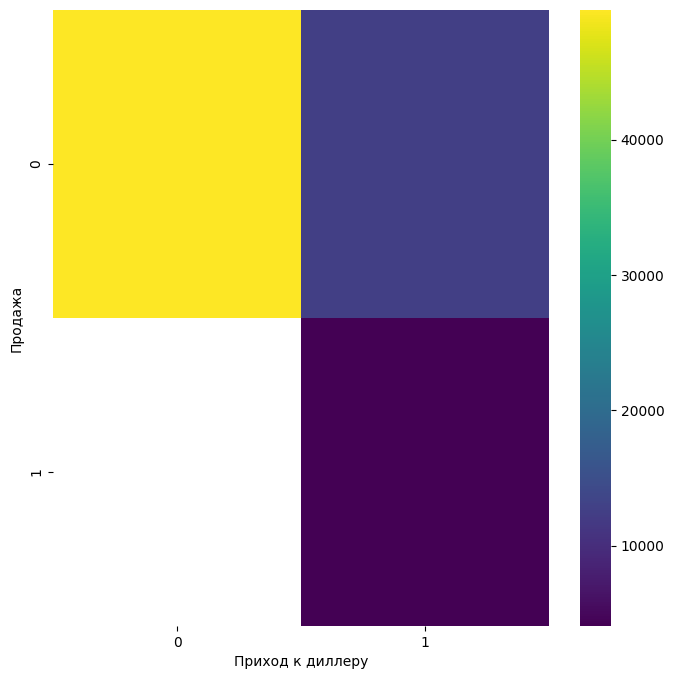

In [61]:
# @title Приход к диллеру vs Продажа

plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Продажа'].value_counts()
    for x_label, grp in df_sheet3.groupby('Приход к диллеру')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Приход к диллеру')
_ = plt.ylabel('Продажа')

In [65]:
# Загрузка данных из таблиц
marketing_data = pd.read_excel('/content/sample_data/Премиум авто.xlsm', sheet_name='Справочник')
directory_data = pd.read_excel('/content/sample_data/Премиум авто.xlsm', sheet_name='Маркетинговые данные')
crm_data = pd.read_excel('/content/sample_data/Премиум авто.xlsm', sheet_name='Данные из CRM')

# Объединение данных по столбцам 'Марка' и 'Модель'
merged_data = pd.merge(marketing_data, directory_data, on=['Марка', 'Модель'], how='inner')
merged_data = pd.merge(merged_data, crm_data, on='Client ID', how='inner')

# Фильтрация пустых столбцов
merged_data = merged_data.dropna(axis=1, how='all')

# Запись данных в текстовый файл
with open('output_data.txt', 'w') as file:
    file.write(merged_data.to_string())

print("Данные успешно записаны в файл 'output_data.txt'")

Данные успешно записаны в файл 'output_data.xlsx'
